# VIIRS Exploring

In [1]:
# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

# Load up the Table

In [2]:
viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet


# LL

In [10]:
print(viirs_tbl.shape)

(1123978, 19)


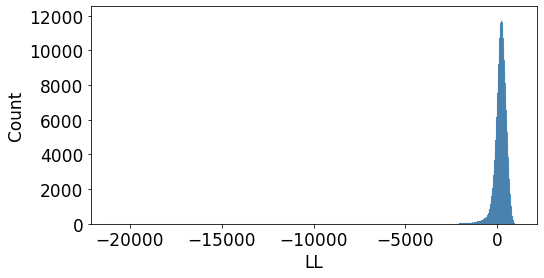

In [11]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

## Zoom in

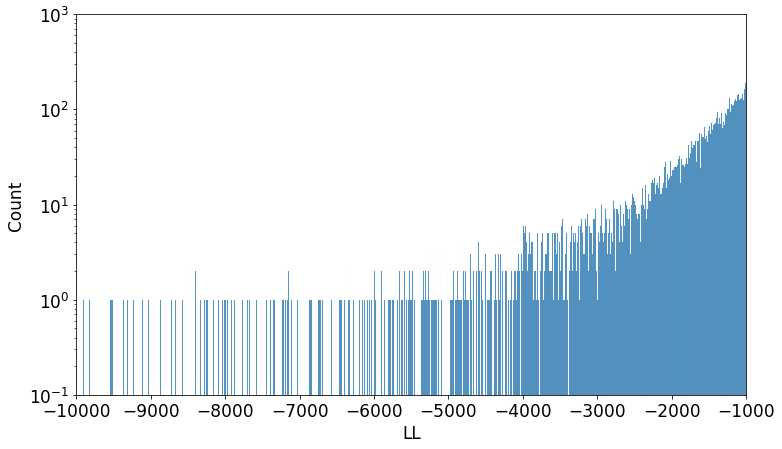

In [12]:
fig = plt.figure(figsize=(12,7))
ax = sns.histplot(data=viirs_tbl, x='LL')
ax.set_xlim(-10000., -1000.)
ax.set_ylim(0.1, 1000.)
ax.set_yscale('log')
#
plotting.set_fontsize(ax, 17.)
plt.show()

## More LL

In [5]:
#viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_tst.parquet')

Read main table: s3://viirs/Tables/VIIRS_2013_tst.parquet


In [13]:
print(viirs_tbl.shape)
#print(viirs_tbl.type)

(1123978, 19)


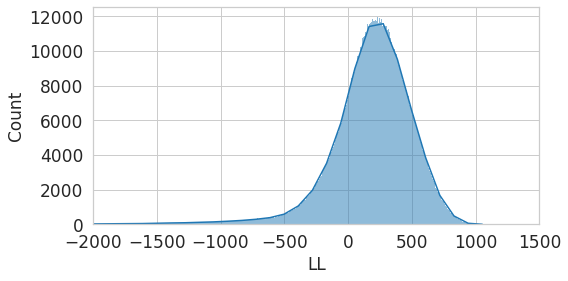

In [52]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL', kde=True)
plotting.set_fontsize(ax, 17.)
ax.set_xlim(-2000., 1500.)
plt.show()

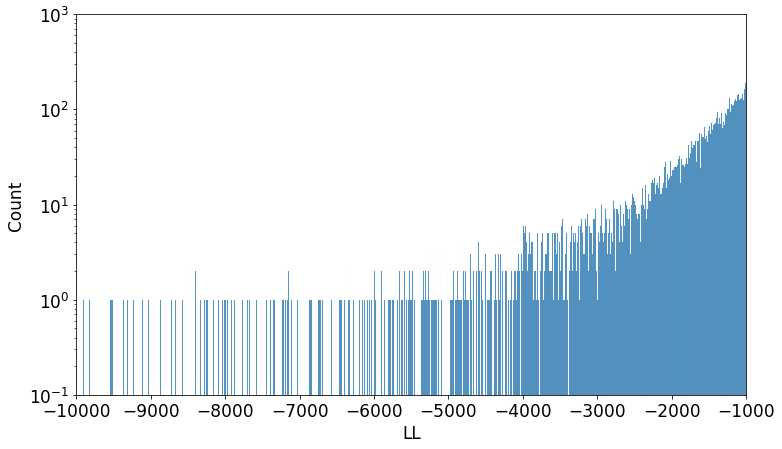

In [15]:
fig = plt.figure(figsize=(12,7))
ax = sns.histplot(data=viirs_tbl, x='LL')
ax.set_xlim(-10000., -1000.)
ax.set_ylim(0.1, 1000.)
ax.set_yscale('log')
#
plotting.set_fontsize(ax, 17.)
plt.show()

## Extreme Tail LL

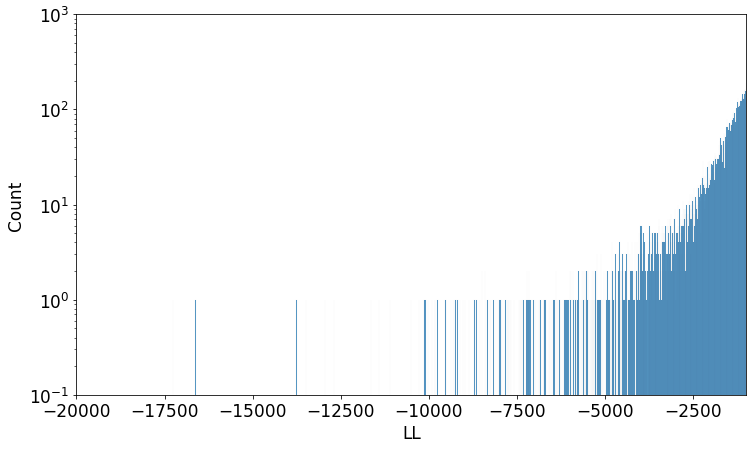

In [16]:
fig = plt.figure(figsize=(12,7))
ax = sns.histplot(data=viirs_tbl, x='LL')
ax.set_xlim(-20000., -1000.)
ax.set_ylim(0.1, 1000.)
ax.set_yscale('log')
#
plotting.set_fontsize(ax, 17.)
plt.show()

## VIIRS Table

In [17]:
print(viirs_tbl.shape)

(1123978, 19)


In [18]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_root,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1020,2592,-55.172756,-165.49512,0.048828,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,622687,0,6.804148,4.529999,7.700012,7.190002,6.470001,300.294861
1,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1055,2561,-54.937588,-165.16225,0.048991,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,581597,0,6.737536,4.529999,7.459991,7.079987,6.242831,300.315857
2,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1104,2592,-54.629894,-165.56808,0.000190,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,371103,0,6.957690,4.529999,7.730011,7.239990,6.720001,454.317627
3,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1125,2540,-54.478348,-164.99258,0.049723,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,145421,0,6.905102,4.950012,8.160004,7.359985,6.410004,305.489746
4,s3://viirs/data/2013/001/20130101001000-OSPO-L...,1154,2543,-54.291890,-165.05530,0.049642,192,2013-01-01 00:10:00,s3://viirs/Extractions/VIIRS_2013_95clear_192x...,s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...,viirs_std,1108162,0,7.107228,5.559998,9.049988,7.679993,6.559998,274.880371


In [19]:
LL = []
for i in range (len(viirs_tbl)):
    logs = viirs_tbl.iloc[i].LL
    LL.append(logs)
    

In [20]:
print(max(LL))
print(min(LL))

1051.6149
-21033.652


In [21]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

The index the highest LL value is 590887
The index the lowest LL value is 302744


In [22]:
print(viirs_tbl.iloc[index1].filename)
print(viirs_tbl.iloc[index2].filename)

s3://viirs/data/2013/188/20130707112000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2013/089/20130330164000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


## High and Low LL Granule

In [23]:
high = 's3://viirs/data/2013/188/20130707112000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2013/089/20130330164000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [24]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

In [25]:
ssthigh = dshigh.sea_surface_temperature.data[0,...]
lathigh = dshigh.lat.data

In [26]:
reload(viirs_io)
reload(viirs_extract)

<module 'ulmo.viirs.extract' from '/home/jovyan/ulmo/viirs/extract.py'>

In [27]:
sst, qual, latitude, longitude = viirs_io.load_nc(high)

In [28]:
gd_data = qual == 5

In [29]:
np.sum(gd_data)

4536464

In [30]:
sst.shape

(5392, 3200)

In [31]:
mask_sst = sst.copy()
mask_sst[~gd_data] = np.nan

In [32]:
np.sum(gd_data[432:432+192, ])


213403

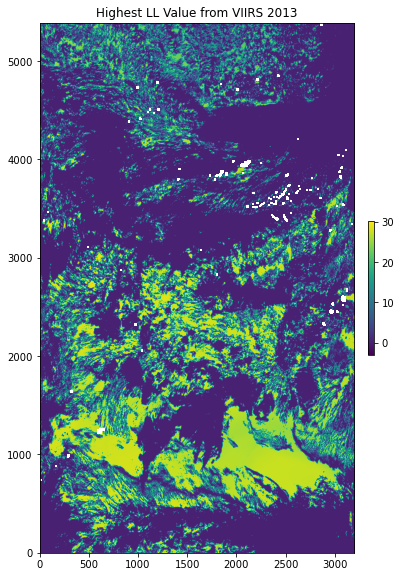

In [33]:
i, j = 1020, 2592
fig = plt.figure(figsize=(6,12))
img = plt.imshow(sst*gd_data, origin='lower', vmin=-3)
#img = plt.imshow((sst*gd_data)[i:i+192, j:j+192], origin='lower', vmin=-3)
cb = plt.colorbar(img, fraction=0.020, pad=0.04)
plt.title('Highest LL Value from VIIRS 2013')
plt.show()

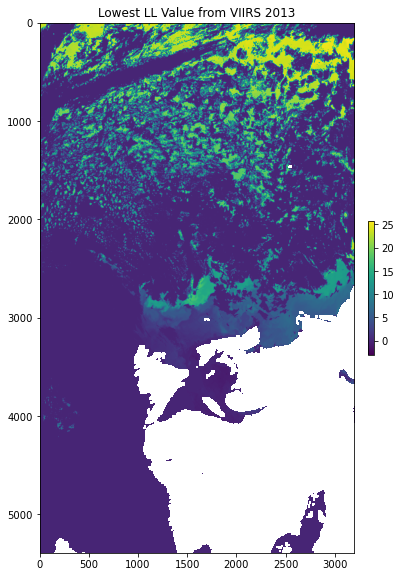

In [34]:
sst, qual, latitude, longitude = viirs_io.load_nc(low)
gd_data = qual == 5
mask_sst = sst.copy()
mask_sst[~gd_data] = np.nan
i, j = 1020, 2592
fig = plt.figure(figsize=(6,12))
img = plt.imshow(sst*gd_data, origin='upper', vmin=-3)
#img = plt.imshow((sst*gd_data)[i:i+192, j:j+192], origin='lower', vmin=-3)
cb = plt.colorbar(img, fraction=0.020, pad=0.04)
plt.title('Lowest LL Value from VIIRS 2013')
plt.show()

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


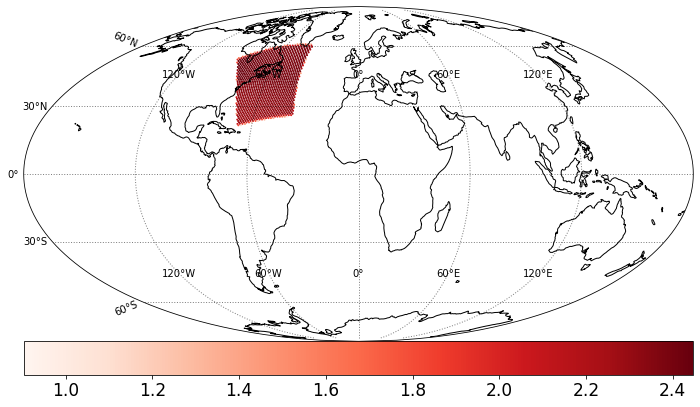

In [36]:
_ = ulmo_figs.show_spatial(dslow)

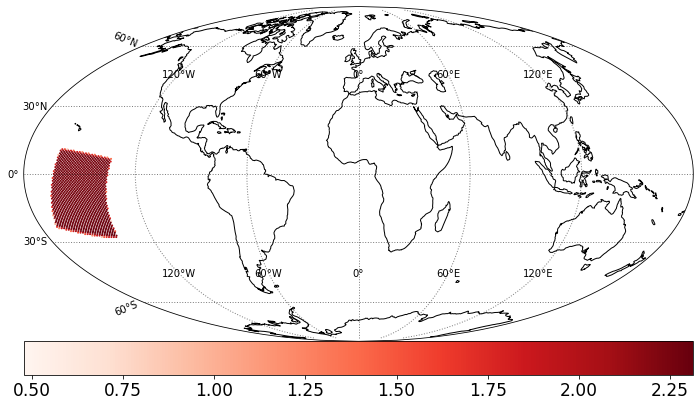

In [37]:
_ = ulmo_figs.show_spatial(dshigh)

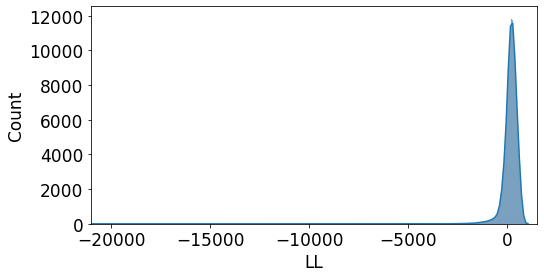

In [39]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL', kde=True)
plotting.set_fontsize(ax, 17.)
ax.set_xlim(-21050., 1500.)
plt.show()

## LLC MODIS vs VIIRS

In [30]:
tbl_file = 's3://llc/Tables/test_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_modis2012.parquet


In [33]:
llc_table['DT'] = llc_table.T90 - llc_table.T10

In [34]:
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.126851,3.401999,6.411,...,0,296266,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,127.225403,1.898000
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315916,3.464000,6.544,...,0,592057,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,53.644531,2.702001
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.914161,3.557000,6.852,...,0,214472,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,161.347656,1.059000
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859090,3.442000,6.709,...,0,467098,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,172.184753,1.102000
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.130058,5.386000,6.852,...,0,415175,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,156.553528,1.012001


(0.0, 10000.0)

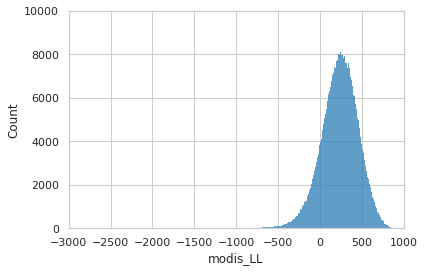

In [54]:
ax = sns.histplot(data=llc_table, x='modis_LL')
ax.set_xlim(-3000., 1000.)
ax.set_ylim(0., 10000.)

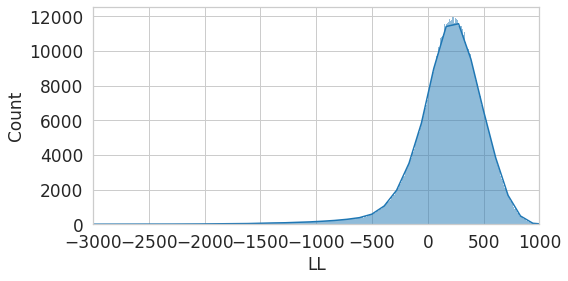

In [55]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL', kde=True)
plotting.set_fontsize(ax, 17.)
ax.set_xlim(-3000., 1000.)
plt.show()

(0.0, 10000.0)

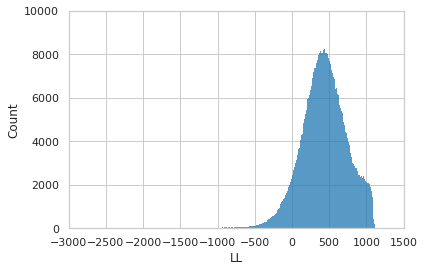

In [58]:
ax = sns.histplot(data=llc_table, x='LL')
ax.set_xlim(-3000., 1500.)
ax.set_ylim(0., 10000.)

In [44]:
low_LL_M = llc_table.LL < -1000.

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


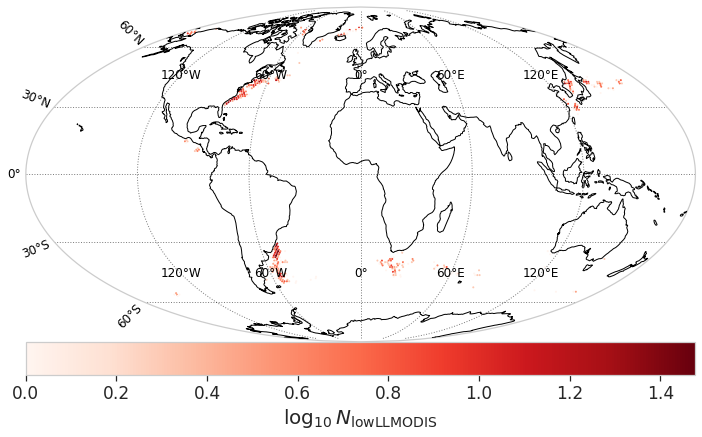

In [45]:
_ = ulmo_figs.show_spatial(llc_table[low_LL_M], lbl='low LL MODIS')

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


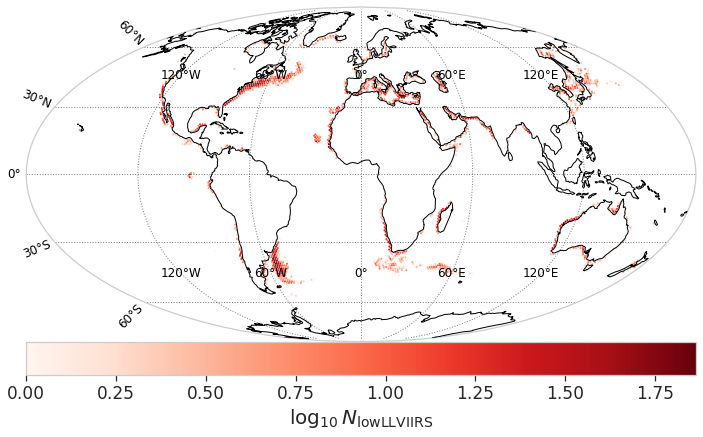

In [52]:
low_LL_V = viirs_tbl.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl[low_LL_V], lbl='low LL VIIRS')

In [53]:
len(low_LL_V)

1123978

In [54]:
len(low_LL_M)

635295

In [49]:
sub_low_vm = low_LL_V - low_LL_M
_ = ulmo_figs.show_spatial(viirs_tbl[sub_low_vm], lbl='low LL VIIRS sub low LL MODIS')

KeyError: "None of [Float64Index([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=1123978)] are in the [columns]"

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


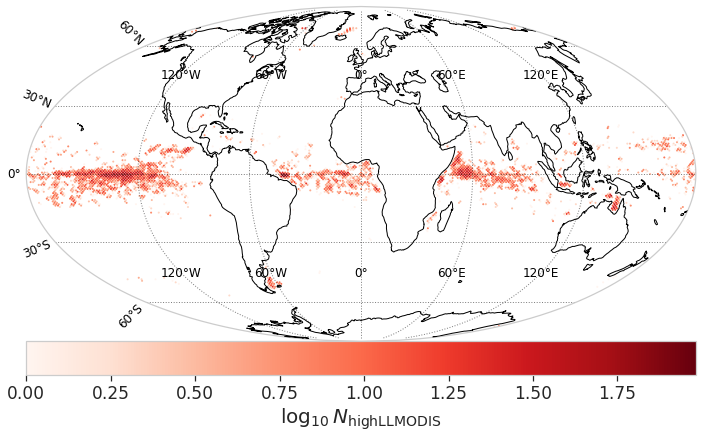

In [66]:
high_LL = llc_table.LL > 1000.
_ = ulmo_figs.show_spatial(llc_table[high_LL], lbl='high LL MODIS')

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


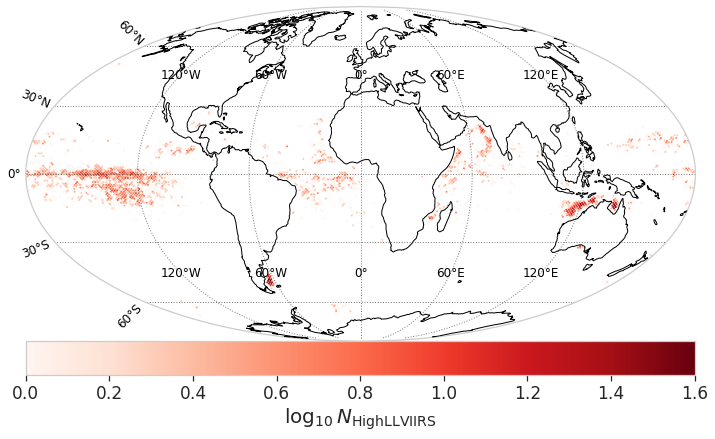

In [7]:
high_LL = viirs_tbl.LL > 800.
_ = ulmo_figs.show_spatial(viirs_tbl[high_LL], lbl='High LL VIIRS')

## Cutouts

In [5]:
viirs_cutouts = ('s3://viirs/PreProc/VIIRS_2013_95clear_192x192_preproc_viirs_std.h5')

In [6]:
with ulmo_io.open(viirs_cutouts, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [7]:
ex_hf.keys()

<KeysViewHDF5 ['valid', 'valid_metadata']>

In [8]:
ex_hf['valid'].shape

(1123978, 1, 64, 64)

In [9]:
ex_hf['valid_metadata'].shape

(1123978, 18)

In [10]:
pal, cm = plotting.load_palette()

In [11]:
def plt_ex(extr):
    fig = plt.figure(figsize=(6,12))
    img = plt.imshow(extr, origin='lower', cmap=cm)#, vmin=-3)
    cb = plt.colorbar(img, fraction=0.020, pad=0.04)
    plt.show()

## 64 x 64 Cutouts

In [42]:
#The index the highest LL value is 590887
#The index the lowest LL value is 302744

lowa = ex_hf['valid_metadata'][0,...][-1] ==  b'26.540008544921875'
print(lowa)

True


In [45]:
high = 's3://viirs/data/2013/188/20130707112000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2013/089/20130330164000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [60]:
high = viirs_tbl.iloc[590887]
low = viirs_tbl.iloc[302744]
f = viirs_tbl.iloc[0]

print(high)
print(low)

filename            s3://viirs/data/2013/188/20130707112000-OSPO-L...
row                                                               720
col                                                              2400
lat                                                          2.233335
lon                                                        -141.47812
clear_fraction                                                    0.0
field_size                                                        192
datetime                                          2013-07-07 11:20:00
ex_filename         s3://viirs/Extractions/VIIRS_2013_95clear_192x...
pp_file             s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...
pp_root                                                     viirs_std
pp_idx                                                         456442
pp_type                                                             0
mean_temperature                                            27.453579
Tmin                

(0.0, 64.0, 64.0, 0.0)

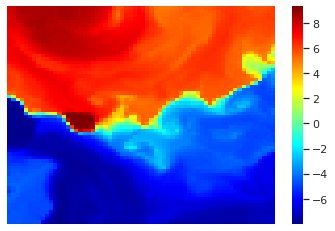

In [53]:
reload(llc_io)
img, pp_hf = llc_io.grab_image(low, close=False)

ax = sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)
ax.axis(True)

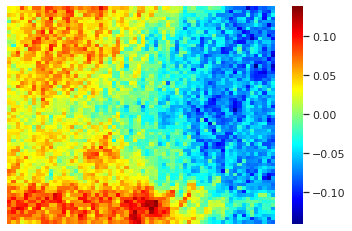

In [51]:
reload(llc_io)
img, pp_hf = llc_io.grab_image(high, close=False)

ax = sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

In [49]:
low.pp_file

's3://viirs/PreProc/VIIRS_2013_95clear_192x192_preproc_viirs_std.h5'

In [50]:
low

filename            s3://viirs/data/2013/089/20130330164000-OSPO-L...
row                                                              2782
col                                                              1503
lat                                                         43.180428
lon                                                        -58.663174
clear_fraction                                               0.049778
field_size                                                        192
datetime                                          2013-03-30 16:40:00
ex_filename         s3://viirs/Extractions/VIIRS_2013_95clear_192x...
pp_file             s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...
pp_root                                                     viirs_std
pp_idx                                                         980664
pp_type                                                             0
mean_temperature                                             9.227524
Tmin                

[[ 7.8295364  8.133587   8.4069195 ...  5.7013636  5.8691387  5.940255 ]
 [ 7.9459286  8.032473   8.340252  ...  5.806917   6.003582   6.020255 ]
 [ 7.7246933  7.9580154  8.269142  ...  5.9813623  6.1069183  6.0746956]
 ...
 [-4.6153007 -4.6308575 -4.644187  ... -7.2219663 -7.1375437 -7.2277517]
 [-4.6119742 -4.650857  -4.6708627 ... -7.1786413 -7.168638  -7.1813774]
 [-4.637531  -4.6564145 -4.681971  ... -7.1753016 -7.066415  -6.9764147]]


<AxesSubplot:>

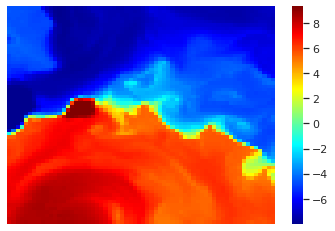

In [59]:
lowa = ((ex_hf['valid'][low.pp_idx, 0, ...]))
print(lowa)
ulmo_plotting.show_image(lowa)

[[ 7.8295364  8.133587   8.4069195 ...  5.7013636  5.8691387  5.940255 ]
 [ 7.9459286  8.032473   8.340252  ...  5.806917   6.003582   6.020255 ]
 [ 7.7246933  7.9580154  8.269142  ...  5.9813623  6.1069183  6.0746956]
 ...
 [-4.6153007 -4.6308575 -4.644187  ... -7.2219663 -7.1375437 -7.2277517]
 [-4.6119742 -4.650857  -4.6708627 ... -7.1786413 -7.168638  -7.1813774]
 [-4.637531  -4.6564145 -4.681971  ... -7.1753016 -7.066415  -6.9764147]]


<AxesSubplot:>

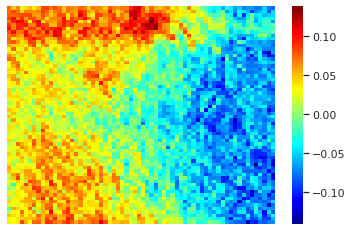

In [61]:
higha = ((ex_hf['valid'][high.pp_idx, 0, ...]))
print(lowa)
ulmo_plotting.show_image(higha)

## Spatial Of Lowest and Highest LL

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


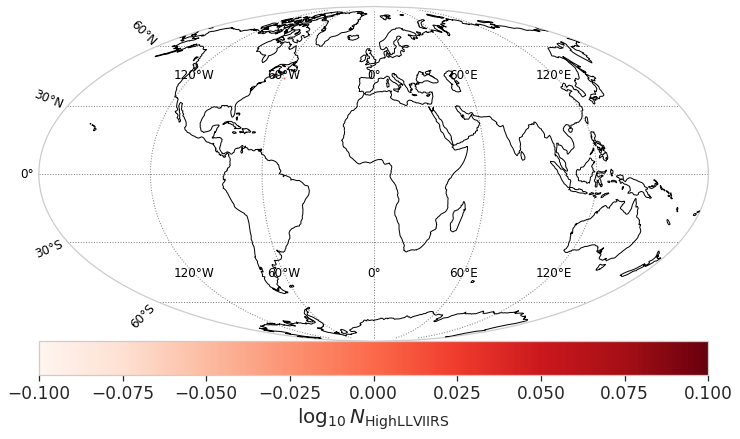

In [72]:
low_LL = viirs_tbl.LL < -21033.
_ = ulmo_figs.show_spatial(viirs_tbl[low_LL], lbl='Lowest LL VIIRS')

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


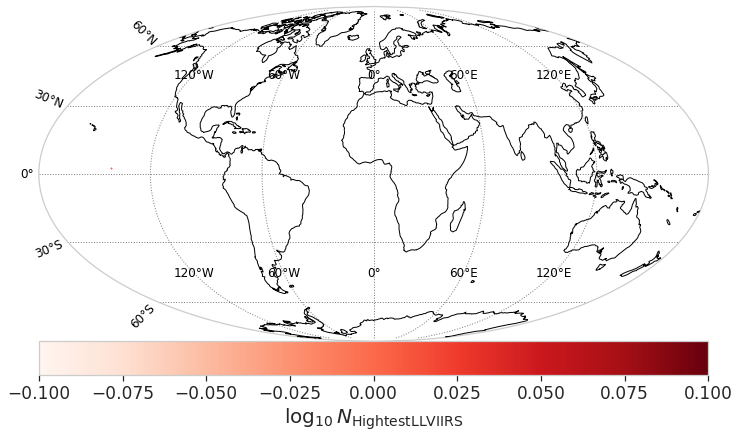

In [73]:
high_LL = viirs_tbl.LL > 1051.
_ = ulmo_figs.show_spatial(viirs_tbl[high_LL], lbl='Hightest LL VIIRS')

In [75]:
low_LL = np.min(viirs_tbl.LL)
low_LL

-21033.65234375

In [3]:
sorted_LL= sorted(viirs_tbl.LL)

In [19]:
highest_1p_LL = sorted_LL[-11240]
print(highest_1p_LL)

760.8605346679688


In [20]:
lowest_1p_LL = sorted_LL[11240]
print(lowest_1p_LL)

-1068.655517578125


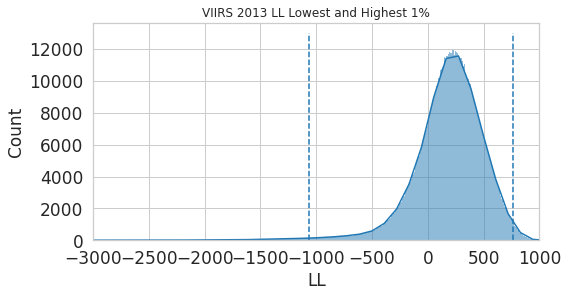

In [23]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl, x='LL', kde=True)
ax.vlines(-1068.655,0,13000,linestyle = '--')
ax.vlines(760.8,0,13000,linestyle = '--')
plotting.set_fontsize(ax, 17.)
ax.set_xlim(-3000., 1000.)
ax.set_title('VIIRS 2013 LL Lowest and Highest 1%')

plt.show()

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


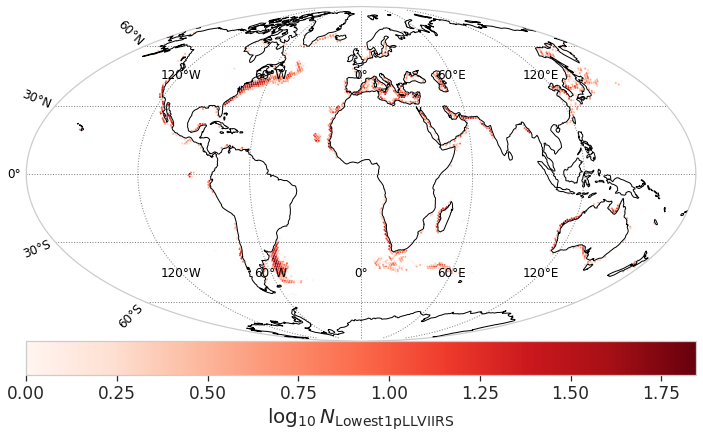

In [28]:
low_LL = viirs_tbl.LL < lowest_1p_LL
_ = ulmo_figs.show_spatial(viirs_tbl[low_LL], lbl='Lowest 1p LL VIIRS')

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


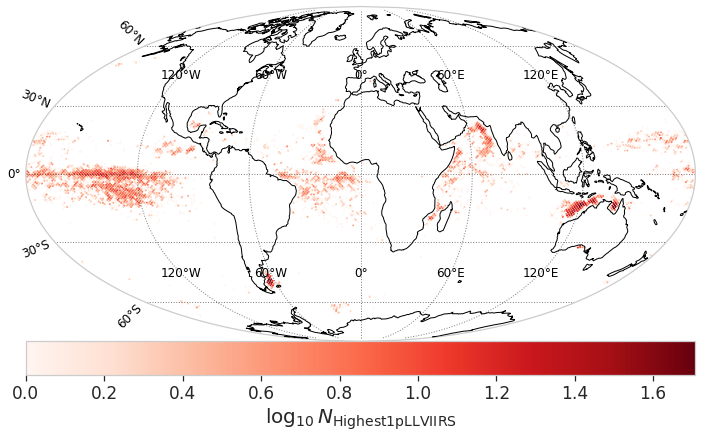

In [27]:
high_LL = viirs_tbl.LL > highest_1p_LL
_ = ulmo_figs.show_spatial(viirs_tbl[high_LL], lbl='Highest 1p LL VIIRS')

In [55]:
print(len(sorted_LL))

1123978


/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


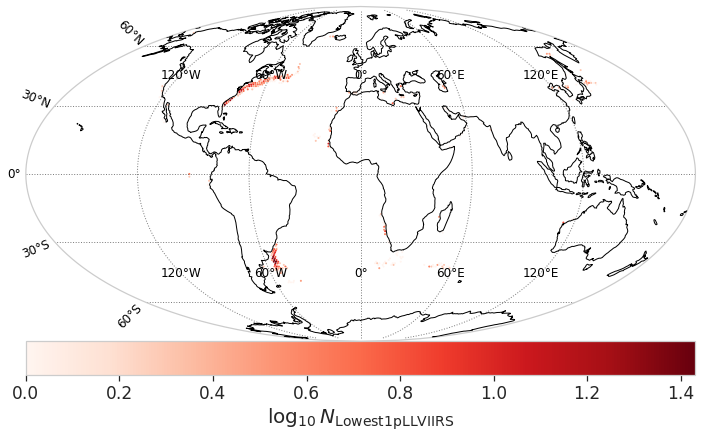

1124


In [59]:
low001 = sorted_LL[1124]
low_LL = viirs_tbl.LL < low001
_ = ulmo_figs.show_spatial(viirs_tbl[low_LL], lbl='Lowest 1p LL VIIRS')

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


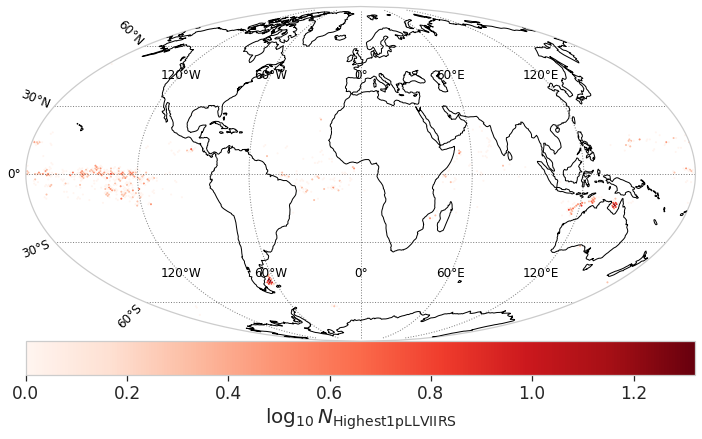

In [61]:
high001 = sorted_LL[-1124]
low_LL = viirs_tbl.LL > high001
_ = ulmo_figs.show_spatial(viirs_tbl[low_LL], lbl='Highest 1p LL VIIRS')

## Preprocesed 64 x 64 Cutouts

In [6]:
pp_files = 's3://viirs/PreProc/VIIRS_2013_95clear_192x192_preproc_viirs_std.h5'

with ulmo_io.open(pp_files, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [11]:
ex_hf.keys()

<KeysViewHDF5 ['valid', 'valid_metadata']>

In [14]:
ex_hf['valid'].shape

(1123978, 1, 64, 64)

## Inpainted Masks

In [15]:
ex_file = 's3://viirs/Extractions/VIIRS_2013_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [16]:
ex_hf.keys()

<KeysViewHDF5 ['fields', 'inpainted_masks', 'metadata']>

In [17]:
ex_hf['fields'].shape

(1123978, 192, 192)

In [28]:
ex_hf['metadata'].shape

(1123978, 6)

In [19]:
pal, cm = plotting.load_palette()

In [20]:
def plt_ex(extr):
    fig = plt.figure(figsize=(6,12))
    img = plt.imshow(extr, origin='lower', cmap=cm)#, vmin=-3)
    cb = plt.colorbar(img, fraction=0.020, pad=0.04)
    plt.show()

In [27]:
high = ex_hf['fields'][590887,]
low =  ex_hf['fields'][302744,]

KeyboardInterrupt: 